In [1]:
%pip install pyalgotrade
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

from pyalgotrade import strategy, barfeed, bar, plotter
from pyalgotrade.bar import Frequency
from pyalgotrade.technical import ma, bollinger
from pyalgotrade.stratanalyzer import returns, sharpe

In [3]:
df = pd.read_csv("NIFTY50.csv")

cols = df.columns[1:] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = np.iinfo(np.int32).max  

df.head()

,Date,Open,High,Low,Close,Volume
0,2012-12-03,5878.25,5899.15,5854.60,5870.9,2147483647
1,2012-12-04,5866.80,5894.95,5859.00,5889.2,2147483647
2,2012-12-05,5906.60,5917.80,5891.35,5900.5,2147483647
3,2012-12-06,5926.30,5942.55,5838.90,5930.9,2147483647
4,2012-12-07,5934.00,5949.85,5888.65,5907.4,2147483647


In [4]:
# Example BarFeed for dataframes with data for a single instrument.
class DataFrameBarFeed(barfeed.BaseBarFeed):
    def __init__(self, dataframe, instrument, frequency):
        super(DataFrameBarFeed, self).__init__(frequency)
        self.registerInstrument(instrument)
        self.__df = dataframe
        self.__instrument = instrument
        self.__next = 0

    def reset(self):
        super(DataFrameBarFeed, self).reset()
        self.__next = 0

    def peekDateTime(self):
        return self.getCurrentDateTime()

    def getCurrentDateTime(self):
        ret = None
        if not self.eof():
            rowkey = self.__df.index[self.__next]
            ret = df.iloc[rowkey]["Date"]
        return ret

    def barsHaveAdjClose(self):
        return False

    def getNextBars(self):
        ret = None
        if not self.eof():
            # Convert the dataframe row into a bar.BasicBar
            rowkey = self.__df.index[self.__next]
            row = self.__df.iloc[rowkey]
            bar_dict = {
                self.__instrument: bar.BasicBar(
                    row["Date"],
                    row["Open"],
                    row["High"],
                    row["Low"],
                    row["Close"],
                    row["Volume"],
                    None,  # row["Adj Close"],
                    self.getFrequency(),
                )
            }

            ret = bar.Bars(bar_dict)
            self.__next += 1
        return ret

    def eof(self):
        return self.__next >= len(self.__df.index)

    def start(self):
        pass

    def stop(self):
        pass

    def join(self):
        pass


2012-12-27 00:00:00 strategy [INFO] BUY at ₹ 5930.20
2012-12-28 00:00:00 strategy [INFO] SELL at ₹ 5887.15
2012-12-31 00:00:00 strategy [INFO] BUY at ₹ 5901.20
2013-02-01 00:00:00 strategy [INFO] SELL at ₹ 6040.95
2013-02-21 00:00:00 strategy [INFO] BUY at ₹ 5909.65
2013-02-22 00:00:00 strategy [INFO] SELL at ₹ 5837.95
2013-03-08 00:00:00 strategy [INFO] BUY at ₹ 5883.65
2013-03-20 00:00:00 strategy [INFO] SELL at ₹ 5740.55
2013-04-17 00:00:00 strategy [INFO] BUY at ₹ 5708.65
2013-05-24 00:00:00 strategy [INFO] SELL at ₹ 6010.70
2013-05-28 00:00:00 strategy [INFO] BUY at ₹ 6086.35
2013-06-03 00:00:00 strategy [INFO] SELL at ₹ 5997.35
2013-07-01 00:00:00 strategy [INFO] BUY at ₹ 5834.10
2013-07-26 00:00:00 strategy [INFO] SELL at ₹ 5937.95
2013-08-16 00:00:00 strategy [INFO] BUY at ₹ 5705.45
2013-08-19 00:00:00 strategy [INFO] SELL at ₹ 5497.55
2013-09-02 00:00:00 strategy [INFO] BUY at ₹ 5480.25
2013-09-04 00:00:00 strategy [INFO] SELL at ₹ 5358.65
2013-09-05 00:00:00 strategy [INFO] B

2017-12-15 00:00:00 strategy [INFO] BUY at ₹ 10345.65
2018-02-05 00:00:00 strategy [INFO] SELL at ₹ 10604.30
2018-02-27 00:00:00 strategy [INFO] BUY at ₹ 10615.20
2018-03-05 00:00:00 strategy [INFO] SELL at ₹ 10428.30
2018-03-13 00:00:00 strategy [INFO] BUY at ₹ 10389.50
2018-03-16 00:00:00 strategy [INFO] SELL at ₹ 10345.15
2018-04-03 00:00:00 strategy [INFO] BUY at ₹ 10186.85
2018-04-05 00:00:00 strategy [INFO] SELL at ₹ 10228.45
2018-04-06 00:00:00 strategy [INFO] BUY at ₹ 10322.75
2018-05-18 00:00:00 strategy [INFO] SELL at ₹ 10671.85
2018-05-29 00:00:00 strategy [INFO] BUY at ₹ 10689.40
2018-05-30 00:00:00 strategy [INFO] SELL at ₹ 10579.00
2018-06-01 00:00:00 strategy [INFO] BUY at ₹ 10738.45
2018-06-06 00:00:00 strategy [INFO] SELL at ₹ 10603.45
2018-06-07 00:00:00 strategy [INFO] BUY at ₹ 10722.60
2018-06-20 00:00:00 strategy [INFO] SELL at ₹ 10734.65
2018-06-21 00:00:00 strategy [INFO] BUY at ₹ 10808.45
2018-06-22 00:00:00 strategy [INFO] SELL at ₹ 10742.70
2018-06-25 00:00:00

2021-12-16 00:00:00 strategy [INFO] SELL at ₹ 17373.00
2021-12-17 00:00:00 strategy [INFO] BUY at ₹ 17276.00
2021-12-20 00:00:00 strategy [INFO] SELL at ₹ 16824.25
2021-12-29 00:00:00 strategy [INFO] BUY at ₹ 17220.10
2022-01-21 00:00:00 strategy [INFO] SELL at ₹ 17613.70
2022-02-03 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill nifty order [307] for 10 share/s
2022-02-10 00:00:00 strategy [INFO] BUY at ₹ 17554.10
2022-02-14 00:00:00 strategy [INFO] SELL at ₹ 17076.15
2022-03-14 00:00:00 strategy [INFO] BUY at ₹ 16633.70
2022-04-13 00:00:00 strategy [INFO] SELL at ₹ 17599.90
2022-05-27 00:00:00 strategy [INFO] BUY at ₹ 16296.60
2022-06-13 00:00:00 strategy [INFO] SELL at ₹ 15877.55
2022-06-28 00:00:00 strategy [INFO] BUY at ₹ 15757.45
2022-08-23 00:00:00 strategy [INFO] SELL at ₹ 17357.35
2022-09-01 00:00:00 strategy [INFO] BUY at ₹ 17485.70
2022-09-02 00:00:00 strategy [INFO] SELL at ₹ 17598.40
2022-09-06 00:00:00 strategy [INFO] BUY at ₹ 17695.70
2022-09-08 00:00:00 stra

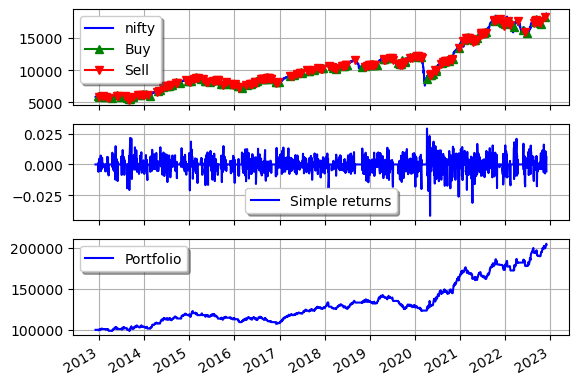

In [5]:
class MyStrategy(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, capital):
        super(MyStrategy, self).__init__(feed, capital)
        self.__instrument = instrument
        self.__position = None
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 15)

    @staticmethod
    def safe_round(value, digits):
        if value is not None:
            value = round(value, digits)
        return value

    def onEnterOk(self, position):
        execInfo = position.getEntryOrder().getExecutionInfo()
        self.info("BUY at \u20B9 %.2f" % (execInfo.getPrice()))

    def onEnterCanceled(self, position):
        self.__position = None

    def onExitOk(self, position):
        execInfo = position.getExitOrder().getExecutionInfo()
        self.info("SELL at \u20B9 %.2f" % (execInfo.getPrice()))
        self.__position = None

    def onExitCanceled(self, position):
        self.__position.exitMarket()

    def onBars(self, bars):
        if self.__sma[-1] is None:
            return

        bar = bars[self.__instrument]
        if self.__position is None:
            if bar.getPrice() > self.__sma[-1]:
                self.__position = self.enterLong(self.__instrument, 10, True)
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():
            self.__position.exitMarket()


capital = 100000
feed = DataFrameBarFeed(df, "nifty", Frequency.DAY)
myStrategy = MyStrategy(feed, "nifty", capital)

returnsAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(returnsAnalyzer)

plt = plotter.StrategyPlotter(myStrategy)

plt.getOrCreateSubplot("returns").addDataSeries("Simple returns", returnsAnalyzer.getReturns())


myStrategy.run()
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())

# Plot the strategy.
plt.plot()

2013-08-07 00:00:00 strategy [INFO] Placing Buy Stop order
2013-08-19 00:00:00 strategy [INFO] Placing Sell Market order
2013-08-20 00:00:00 strategy [INFO] Placing Buy Stop order
2013-08-21 00:00:00 strategy [INFO] Placing Sell Market order
2013-08-22 00:00:00 strategy [INFO] Placing Buy Stop order
2013-10-30 00:00:00 strategy [INFO] Placing Sell Market order
2015-06-09 00:00:00 strategy [INFO] Placing Buy Stop order
2015-06-11 00:00:00 strategy [INFO] Placing Sell Market order
2015-06-12 00:00:00 strategy [INFO] Placing Buy Stop order
2015-06-22 00:00:00 strategy [INFO] Placing Sell Market order
2015-08-24 00:00:00 strategy [INFO] Placing Buy Stop order
2015-08-25 00:00:00 strategy [INFO] Placing Buy Stop order
2015-09-04 00:00:00 strategy [INFO] Placing Sell Market order
2015-09-07 00:00:00 strategy [INFO] Placing Buy Stop order
2016-01-12 00:00:00 strategy [INFO] Placing Sell Market order
2016-01-13 00:00:00 strategy [INFO] Placing Buy Stop order
2016-01-18 00:00:00 strategy [INFO]

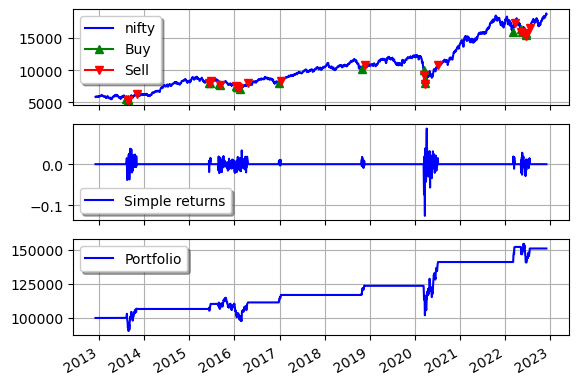

In [11]:
from pyalgotrade import strategy
from pyalgotrade.technical import bollinger
from pyalgotrade.stratanalyzer import sharpe

# Work in Progress
class BBands(strategy.BacktestingStrategy):

    def __init__(self, feed, instrument, bBandsPeriod, capital):
        super(BBands, self).__init__(feed, capital)
        self.__instrument = instrument
        self.__bbands = bollinger.BollingerBands(
            feed[instrument].getCloseDataSeries(), bBandsPeriod, 1.5
        )
        self.__position = None
        self.__SL=0
        self.RR_ratio=5
        self.__TL=0

    def getBollingerBands(self):
        return self.__bbands

    def onEnterCanceled(self, position):
        #restore position
        self.__position = None

    def onEnterOK(self, position):
        print(position)
        pass

    def onExitOk(self, position):
        self.__position = None

    def onExitCanceled(self, position):
        # If the exit was canceled, re-submit it.
        self.__position.exitMarket()

    def onBars(self, bars):
        lower = self.__bbands.getLowerBand()[-1]
        upper = self.__bbands.getUpperBand()[-1]
        if lower is None:
            return

        shares = self.getBroker().getShares(self.__instrument)
        bar = bars[self.__instrument]

        
        

        if self.__position is None:
            if bar.getHigh() < lower:
                sharesToBuy = int(self.getBroker().getCash(False) / bar.getHigh())
                self.info("Placing Buy Stop order")
                self.__position=self.enterLongStop(self.__instrument, bar.getHigh(), sharesToBuy)
                self.SL=bar.getLow()
                self.TL=(bar.getHigh()-bar.getLow())*self.RR_ratio+bar.getHigh()

        elif (bar.getClose() <= self.SL or bar.getClose() >= self.TL) and not self.__position.exitActive():
            self.info("Placing Sell Market order")
            self.__position.exitMarket(goodTillCanceled=None)


# instrument = "nifty"
# bBandsPeriod = 40
# capital = 100000

# strat = BBands(feed, instrument, bBandsPeriod, capital)
# sharpeRatioAnalyzer = sharpe.SharpeRatio()
# strat.attachAnalyzer(sharpeRatioAnalyzer)

# plt = plotter.StrategyPlotter(strat, True, True, True)
# plt.getInstrumentSubplot(instrument).addDataSeries("upper", strat.getBollingerBands().getUpperBand())
# plt.getInstrumentSubplot(instrument).addDataSeries("lower", strat.getBollingerBands().getLowerBand())

# strat.run()
# #print("Sharpe ratio: %.2f" % sharpeRatioAnalyzer.getSharpeRatio(0.05))

# plt.plot()

capital = 100000
feed = DataFrameBarFeed(df, "nifty", Frequency.DAY)
myStrategy = BBands(feed, "nifty", 150, capital)

returnsAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(returnsAnalyzer)

plt = plotter.StrategyPlotter(myStrategy)

plt.getOrCreateSubplot("returns").addDataSeries("Simple returns", returnsAnalyzer.getReturns())


myStrategy.run()
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())

# Plot the strategy.
plt.plot()


To create a strategy that uses Bollinger Bands and places market and limit orders in PyAlgoTrade, you can use the following steps:

1. Create a class that extends the `strategy.BacktestingStrategy` class. This class will contain the logic for your trading strategy.
2. In the `__init__` method of your `strategy` class, initialize the Bollinger Bands indicator and a `broker.Broker` object. You can use the indicator.BollingerBands class to create the Bollinger Bands indicator, and the `broker.backtesting`.Broker class to create a `broker.Broker` object for backtesting.
3. Override the `onBars` method of the `strategy` class. This method is called for each bar in the data set and contains the logic for your trading strategy.
4. In the onBars method, use the Bollinger Bands indicator to calculate the upper and lower bands for the current bar. Then, use the `broker.Broker` object to place market and limit orders based on the position of the security relative to the Bollinger Bands. You can use the `broker.placeMarketOrder` and `broker.createLimitOrder` methods to place market and limit orders, respectively.
5. To track the position of your investment, you can use the `position.Position` class. In the `onBars` method, create a `position.Position` object for the security and use the update method to update the position with each new trade.